In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv("Housing.csv")
# print(data)
# data = data.loc[(data["hotwaterheating"]=="no") & (data["basement"]=="no") & (data["mainroad"]=="no") & (data["guestroom"]=="no")&(data["airconditioning"]=="no")&(data["furnishingstatus"]=="unfurnished")]
data.sort_values(by=["price","area","bedrooms","stories","bathrooms"],ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [19]:
start = 0
end = 5
# data.shape[0]


rawPrice = data["price"][start:end]
meanPrice = rawPrice.mean()
stdPrice = rawPrice.std()
standardPrice = np.array((rawPrice-meanPrice)/stdPrice)


rawArea = data["area"][start:end]
meanArea = rawArea.mean()
stdArea = rawArea.std()
standardArea = np.array((rawArea-meanArea)/stdArea)


rawBedrooms = data["bedrooms"][start:end]
meanBedrooms = rawBedrooms.mean()
stdBedrooms = rawBedrooms.std()
standardBedrooms = np.array((rawBedrooms-meanBedrooms)/stdBedrooms)
standardBedrooms[np.isnan(standardBedrooms)] = 0


rawBathrooms = data["bathrooms"][start:end]
meanBathrooms = rawBathrooms.mean()
stdBathrooms = rawBathrooms.std()
standardBathrooms = np.array((rawBathrooms - meanBathrooms) / stdBathrooms)
standardBathrooms[np.isnan(standardBathrooms)] = 0



rawStories = data["stories"][start:end]
meanStories = rawStories.mean()
stdStories = rawStories.std()
standardStories = np.array((rawStories-meanStories)/stdStories)
standardStories[np.isnan(standardStories)] = 0


[0.53643279 0.36601706 0.51752153 0.42069301] 3.4546147797658837e-16


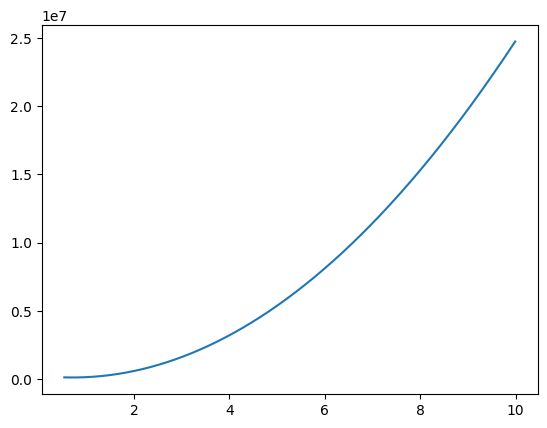

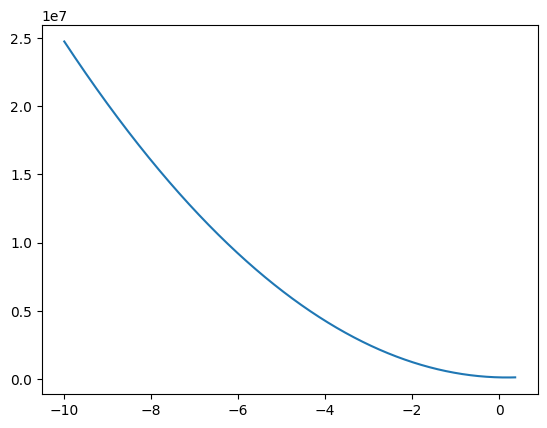

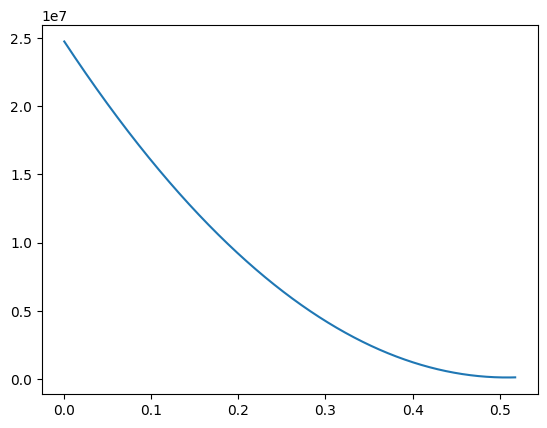

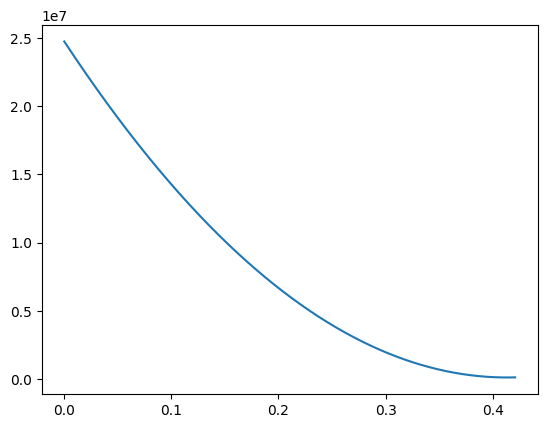

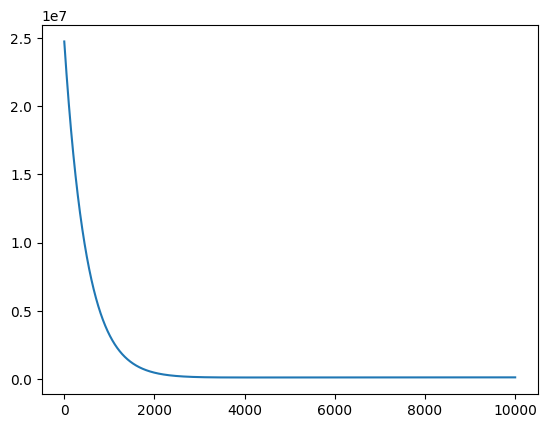

In [20]:
w = np.array([10,-10,0,0])
b = 0
x = [standardArea,standardBedrooms,standardBathrooms,standardStories]
y = standardPrice
m=len(x[0])

def multiGradient(w, b, alp, x, y):
    m = len(x[0])  # Number of training examples
    n_features = len(w)

    dj_dws = np.zeros(n_features)
    for i in range(n_features):
        dj_dws[i] = (1/m) * np.sum(x[i] * (w[i] * x[i] + b - y))

    new_ws = np.zeros(n_features)
    for i in range(n_features):
        new_ws[i] = w[i] - alp * dj_dws[i]

    dj_db = (1/m) * np.sum((np.dot(w, x) + b - y))

    new_b = b - alp * dj_db

    # for i in range(len()):

    return new_ws, new_b

cps=[]
w1=[]
w2=[]
w3=[]
w4=[]
bs=[]

for i in range(10000):
    w,b = multiGradient(w,b,0.001,x,y)
    cp = (1/2*m)*np.sum((np.dot(w,x)+b-y)**2)
    cps.append(cp)
    w1.append(w[0])
    w2.append(w[1])
    w3.append(w[2])
    w4.append(w[3])
# print(cps)
print(w,b)

plt.plot(w1,cps)
plt.show()
plt.plot(w2,cps)
plt.show()
plt.plot(w3,cps)
plt.show()
plt.plot(w4,cps)
plt.show()
plt.plot(np.arange(10000),cps)
plt.show()
        

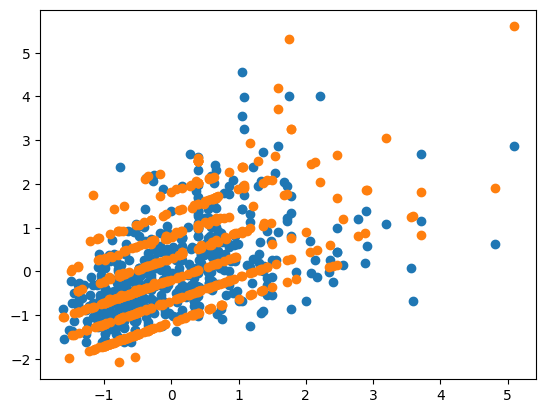

In [21]:
plt.scatter(standardArea,standardPrice)
plt.scatter(standardArea,np.dot(w,x)+b)
plt.show()

In [24]:
n = 10
price = rawPrice.iloc[n]
area = standardArea[n]
bedrooms = standardBedrooms[n]
bathrooms = standardBathrooms[n]
stories = standardStories[n]
print(f"Area:      {rawArea.iloc[n]} \nBedrooms:  {rawBedrooms.iloc[n]}  \nBathrooms: {rawBathrooms.iloc[n]}  \nStories:   {rawStories.iloc[n]}")

x_ = np.array([area,bedrooms,bathrooms,stories])
y_ = price

predicted = (np.dot(w,x_)+b)*stdPrice+meanPrice

print(f"Original Price of House is \t{price}")
print(f"Predicted Price of House is \t{round(predicted)}")


Area:      13200 
Bedrooms:  3  
Bathrooms: 1  
Stories:   2
Original Price of House is 	9800000
Predicted Price of House is 	8145728


In [25]:
# priceTest = rawPrice[n]
areaTest =5000
bedroomsTest = 4
bathroomsTest = 2
storiesTest = 2

stdAreaTest = (areaTest-meanArea)/stdArea
stdBedroomsTest = (bedroomsTest-meanBedrooms)/stdBedrooms
stdBathroomsTest = (bathroomsTest-meanBathrooms)/(stdBathrooms+1)
stdStoriesTest = (storiesTest-meanStories)/stdStories

x_ = np.array([stdAreaTest,stdBedroomsTest,stdBathroomsTest,stdStoriesTest])

predicted = (np.dot(w,x_)+b)*stdPrice+meanPrice

print(f"Predicted Price of House is \t{round(predicted)}")

Predicted Price of House is 	6293319
